# Parnian Taheri - 99106352
## Deep Learning Course
### Project - Phase 2

In [2]:
import os
import cv2
import torch
import numpy as np
import pandas as pd
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import shutil

from google.colab import drive
drive.mount('/content/drive')

# Create a Proper Dataset

### Download Dataset

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ayushspai/sportsmot/versions/1")

print("Path to dataset files:", path)

100%|██████████| 33.5G/33.5G [06:56<00:00, 86.5MB/s]


Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ayushspai/sportsmot/versions/1


In [3]:
# path = /root/.cache/kagglehub/datasets/ayushspai/sportsmot/versions/1
print("Files in dataset directory:", os.listdir(path+"/sportsmot_publish"))

Files in dataset directory: ['splits_txt', 'dataset', 'scripts']


In [4]:
# Move data from it's directory to colab
!mv {path} /content/SportsMOT
print("Dataset moved to /content/SportsMOT")

Dataset moved to /content/SportsMOT


In [5]:
!ls /content/SportsMOT/sportsmot_publish/dataset

test  train  val


In [6]:
# List of Football videos
!cat /content/SportsMOT/sportsmot_publish/splits_txt/football.txt

v_-hhDbvY5aAM_c001
v_-hhDbvY5aAM_c002
v_-hhDbvY5aAM_c005
v_-hhDbvY5aAM_c006
v_-hhDbvY5aAM_c007
v_-hhDbvY5aAM_c008
v_-hhDbvY5aAM_c009
v_-hhDbvY5aAM_c011
v_-hhDbvY5aAM_c012
v_-hhDbvY5aAM_c600
v_-hhDbvY5aAM_c602
v_1UDUODIBSsc_c001
v_1UDUODIBSsc_c004
v_1UDUODIBSsc_c015
v_1UDUODIBSsc_c037
v_1UDUODIBSsc_c055
v_1UDUODIBSsc_c056
v_1UDUODIBSsc_c063
v_1UDUODIBSsc_c067
v_1UDUODIBSsc_c090
v_1UDUODIBSsc_c103
v_1UDUODIBSsc_c111
v_1UDUODIBSsc_c113
v_1UDUODIBSsc_c601
v_1UDUODIBSsc_c602
v_1UDUODIBSsc_c603
v_1UDUODIBSsc_c606
v_1UDUODIBSsc_c609
v_1UDUODIBSsc_c615
v_1yHWGw8DH4A_c029
v_1yHWGw8DH4A_c047
v_1yHWGw8DH4A_c077
v_1yHWGw8DH4A_c601
v_1yHWGw8DH4A_c609
v_1yHWGw8DH4A_c610
v_2ChiYdg5bxI_c039
v_2ChiYdg5bxI_c044
v_2ChiYdg5bxI_c046
v_2ChiYdg5bxI_c058
v_2ChiYdg5bxI_c067
v_2ChiYdg5bxI_c072
v_2ChiYdg5bxI_c086
v_2ChiYdg5bxI_c115
v_2ChiYdg5bxI_c120
v_2ChiYdg5bxI_c128
v_2ChiYdg5bxI_c135
v_2ChiYdg5bxI_c136
v_2ChiYdg5bxI_c600
v_2ChiYdg5bxI_c601
v_2ChiYdg5bxI_c602
v_2QhNRucNC7E_c017
v_DjtFlW2eHFI_c614
v_DjtFlW2eHF

### Football Folders

v_-hhDbvY5aAM_c001
v_-hhDbvY5aAM_c002
v_-hhDbvY5aAM_c005
v_-hhDbvY5aAM_c006
v_-hhDbvY5aAM_c007
v_-hhDbvY5aAM_c008
v_-hhDbvY5aAM_c009
v_-hhDbvY5aAM_c011
v_-hhDbvY5aAM_c012
v_-hhDbvY5aAM_c600
v_-hhDbvY5aAM_c602
v_1UDUODIBSsc_c001
v_1UDUODIBSsc_c004
v_1UDUODIBSsc_c015
v_1UDUODIBSsc_c037
v_1UDUODIBSsc_c055
v_1UDUODIBSsc_c056
v_1UDUODIBSsc_c063
v_1UDUODIBSsc_c067
v_1UDUODIBSsc_c090
v_1UDUODIBSsc_c103
v_1UDUODIBSsc_c111
v_1UDUODIBSsc_c113
v_1UDUODIBSsc_c601
v_1UDUODIBSsc_c602
v_1UDUODIBSsc_c603
v_1UDUODIBSsc_c606
v_1UDUODIBSsc_c609
v_1UDUODIBSsc_c615
v_1yHWGw8DH4A_c029
v_1yHWGw8DH4A_c047
v_1yHWGw8DH4A_c077
v_1yHWGw8DH4A_c601
v_1yHWGw8DH4A_c609
v_1yHWGw8DH4A_c610
v_2ChiYdg5bxI_c039
v_2ChiYdg5bxI_c044
v_2ChiYdg5bxI_c046
v_2ChiYdg5bxI_c058
v_2ChiYdg5bxI_c067
v_2ChiYdg5bxI_c072
v_2ChiYdg5bxI_c086
v_2ChiYdg5bxI_c115
v_2ChiYdg5bxI_c120
v_2ChiYdg5bxI_c128
v_2ChiYdg5bxI_c135
v_2ChiYdg5bxI_c136
v_2ChiYdg5bxI_c600
v_2ChiYdg5bxI_c601
v_2ChiYdg5bxI_c602
v_2QhNRucNC7E_c017
v_DjtFlW2eHFI_c614
v_DjtFlW2eHFI_c616
v_G-vNjfx1GGc_c004
v_G-vNjfx1GGc_c008
v_G-vNjfx1GGc_c600
v_G-vNjfx1GGc_c601
v_HdiyOtliFiw_c003
v_HdiyOtliFiw_c004
v_HdiyOtliFiw_c008
v_HdiyOtliFiw_c010
v_HdiyOtliFiw_c602
v_ITo3sCnpw_k_c007
v_ITo3sCnpw_k_c010
v_ITo3sCnpw_k_c011
v_ITo3sCnpw_k_c012
v_dw7LOz17Omg_c053
v_dw7LOz17Omg_c067
v_foGDoBblREI_c002
v_foGDoBblREI_c008
v_gQNyhv8y0QY_c003
v_gQNyhv8y0QY_c012
v_gQNyhv8y0QY_c013
v_i2_L4qquVg0_c006
v_i2_L4qquVg0_c007
v_i2_L4qquVg0_c009
v_i2_L4qquVg0_c010
v_iF9bKPWdZlc_c001
v_iF9bKPWdZlc_c003
v_iIxMOsCGH58_c013

In [7]:
football_videos = []
with open("/content/SportsMOT/sportsmot_publish/splits_txt/football.txt", "r") as f:
    football_videos = [line.strip() for line in f.readlines()]

print("Football Video Files:", football_videos[:5])  # Show first 5 filenames


Football Video Files: ['v_-hhDbvY5aAM_c001', 'v_-hhDbvY5aAM_c002', 'v_-hhDbvY5aAM_c005', 'v_-hhDbvY5aAM_c006', 'v_-hhDbvY5aAM_c007']


In [8]:
seq_name = 'v_1yHWGw8DH4A_c047'
source_folder = f"/content/SportsMOT/sportsmot_publish/dataset/train/v_1yHWGw8DH4A_c047"
destination_folder = f"/content/"+seq_name

if os.path.exists(destination_folder):
    shutil.rmtree(destination_folder)
shutil.move(source_folder, destination_folder)
if 'google.colab' in str(get_ipython()):
    shutil.make_archive(destination_folder, 'zip', destination_folder)
#     # from google.colab import files
#     # files.download(destination_folder + ".zip")
#     # print("Download started.")

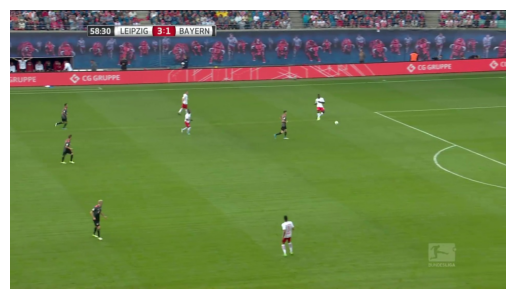

In [9]:
image_path = os.path.join(destination_folder+f'/img1')
image = cv2.imread(image_path+f'/000012.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis('off')
plt.show()

### Read Metadata

In [10]:
seq_info_path = seq_name+"/seqinfo.ini"

with open(seq_info_path, "r") as f:
    print(f.read())

[Sequence]
name=v_1yHWGw8DH4A_c047
imDir=img1
frameRate=25
seqLength=537
imWidth=1280
imHeight=720
imExt=.jpg


### Load gt (ground truth)

In [11]:
gt_path = seq_name+"/gt/gt.txt"
gt_df = pd.read_csv(gt_path, header=None)

# Assign column names based on MOT format
gt_df.columns = ["frame_id", "object_id", "x", "y", "width", "height", "confidence", "class", "visibility"]

print(gt_df.head())

   frame_id  object_id    x    y  width  height  confidence  class  visibility
0         1          0   38  162     27      72           1      1           1
1         1          1   26  194     22      69           1      1           1
2         1          2  158  245     43      70           1      1           1
3         1          3  186  318     55      81           1      1           1
4         1          4  276  481     50     107           1      1           1


### Display with Bounding Boxes

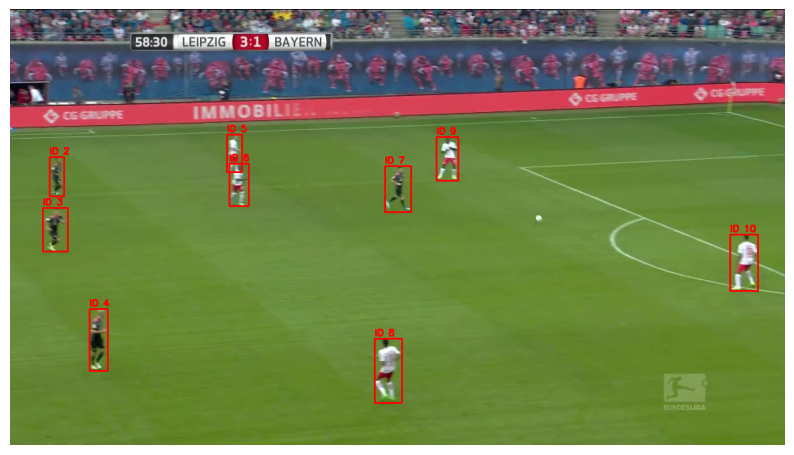

In [12]:
def show_frame_with_annotations(seq_name, frame_id):
    img_path = f"{seq_name}/img1/{frame_id:06d}.jpg"
    gt_path = f"{seq_name}/gt/gt.txt"

    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    gt_df = pd.read_csv(gt_path, header=None)
    gt_df.columns = ["frame_id", "object_id", "x", "y", "width", "height", "confidence", "class", "visibility"]
    frame_data = gt_df[gt_df["frame_id"] == frame_id]

    # Draw bounding boxes
    for _, row in frame_data.iterrows():
        x, y, w, h = int(row["x"]), int(row["y"]), int(row["width"]), int(row["height"])
        object_id = int(row["object_id"])
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(image, f"ID {object_id}", (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    plt.figure(figsize=(10, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

show_frame_with_annotations(seq_name, 20)

In [13]:
transform = A.Compose([
    A.Resize(720, 1280),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.3),
    ToTensorV2()
], bbox_params=A.BboxParams(format="pascal_voc", label_fields=["category_ids"]) # Add bbox_params
)

class SoccerMOTDataset(Dataset):
    def __init__(self, root_dir, seq_name, transform=None):
        self.root_dir = root_dir
        self.seq_name = seq_name
        self.transform = transform

        gt_path = os.path.join(root_dir, seq_name, "gt", "gt.txt")
        self.annotations = pd.read_csv(gt_path, header=None)
        self.annotations.columns = ["frame_id", "object_id", "x", "y", "width", "height", "confidence", "class", "visibility"]

    def __len__(self):
        return self.annotations["frame_id"].nunique()

    def __getitem__(self, idx):
        frame_id = idx + 1  # Frame indices start from 1
        frame_path = os.path.join(self.root_dir, self.seq_name, "img1", f"{frame_id:06d}.jpg")

        image = cv2.imread(frame_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Get bounding boxes
        frame_data = self.annotations[self.annotations["frame_id"] == frame_id]
        bboxes = frame_data[['x', 'y', 'width', 'height']].values.tolist()
        object_ids = frame_data['object_id'].values.tolist()

        # Albumentations requires bounding boxes in (x_min, y_min, x_max, y_max) format
        bboxes = [[x, y, x + w, y + h] for x, y, w, h in bboxes]

        if self.transform:
            augmented = self.transform(image=image, bboxes=bboxes, category_ids=object_ids)
            image = augmented['image']
            bboxes = augmented['bboxes']

        return {
            "image": image,
            "bboxes": torch.tensor(bboxes, dtype=torch.float32),
            "object_ids": torch.tensor(object_ids, dtype=torch.int64),
        }


dataset = SoccerMOTDataset(
    root_dir=".",
    seq_name=seq_name,
    transform=transform
)

dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

In [14]:
sample = dataset[0]
print("Image shape:", sample["image"].shape)
print("Bounding Boxes:", sample["bboxes"])
print("Object IDs:", sample["object_ids"])

Image shape: torch.Size([3, 720, 1280])
Bounding Boxes: tensor([[1215.0000,  162.0000, 1242.0000,  234.0000],
        [1232.0000,  194.0000, 1254.0000,  263.0000],
        [1079.0000,  245.0000, 1122.0000,  315.0000],
        [1039.0000,  318.0000, 1094.0000,  399.0000],
        [ 954.0000,  481.0000, 1004.0000,  588.0000],
        [ 743.0000,  216.0000,  772.0000,  284.0000],
        [ 733.0000,  250.0000,  757.0000,  323.0000],
        [ 505.0000,  262.0000,  559.0000,  342.0000],
        [ 454.0000,  513.0000,  490.0000,  625.0000],
        [ 385.0000,  215.0000,  421.0000,  283.0000]])
Object IDs: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


### Extract Football Videos of Train, Val, and Test

In [16]:
import os
import shutil

dataset_root = "SportsMOT/sportsmot_publish/dataset"

train_dir = os.path.join(dataset_root, "train")
val_dir = os.path.join(dataset_root, "val")
test_dir = os.path.join(dataset_root, "test")

filtered_train_dir = os.path.join(dataset_root, "train_football")
filtered_val_dir = os.path.join(dataset_root, "val_football")
filtered_test_dir = os.path.join(dataset_root, "test_football")

for path in [filtered_train_dir, filtered_val_dir, filtered_test_dir]:
    os.makedirs(path, exist_ok=True)

def filter_and_copy_football_videos(original_dir, filtered_dir, football_videos):
    for folder in os.listdir(original_dir):
        if folder in football_videos:
            src_path = os.path.join(original_dir, folder)
            dest_path = os.path.join(filtered_dir, folder)
            shutil.copytree(src_path, dest_path, dirs_exist_ok=True)
            print(f"Copied: {folder}")

filter_and_copy_football_videos(train_dir, filtered_train_dir, football_videos)
filter_and_copy_football_videos(val_dir, filtered_val_dir, football_videos)
filter_and_copy_football_videos(test_dir, filtered_test_dir, football_videos)

print("Football dataset filtering complete!")


Copied: v_HdiyOtliFiw_c004
Copied: v_HdiyOtliFiw_c008
Copied: v_gQNyhv8y0QY_c012
Copied: v_gQNyhv8y0QY_c003
Copied: v_1yHWGw8DH4A_c077
Copied: v_HdiyOtliFiw_c003
Copied: v_iIxMOsCGH58_c013
Copied: v_1yHWGw8DH4A_c601
Copied: v_1yHWGw8DH4A_c610
Copied: v_HdiyOtliFiw_c602
Copied: v_1yHWGw8DH4A_c609
Copied: v_HdiyOtliFiw_c010
Copied: v_gQNyhv8y0QY_c013
Copied: v_1yHWGw8DH4A_c029
Copied: v_i2_L4qquVg0_c006
Copied: v_G-vNjfx1GGc_c601
Copied: v_i2_L4qquVg0_c007
Copied: v_G-vNjfx1GGc_c008
Copied: v_ITo3sCnpw_k_c012
Copied: v_ITo3sCnpw_k_c010
Copied: v_i2_L4qquVg0_c009
Copied: v_dw7LOz17Omg_c067
Copied: v_i2_L4qquVg0_c010
Copied: v_ITo3sCnpw_k_c011
Copied: v_G-vNjfx1GGc_c600
Copied: v_G-vNjfx1GGc_c004
Copied: v_2QhNRucNC7E_c017
Copied: v_ITo3sCnpw_k_c007
Copied: v_dw7LOz17Omg_c053
Copied: v_2ChiYdg5bxI_c044
Copied: v_2ChiYdg5bxI_c115
Copied: v_1UDUODIBSsc_c103
Copied: v_1UDUODIBSsc_c090
Copied: v_-hhDbvY5aAM_c005
Copied: v_-hhDbvY5aAM_c006
Copied: v_2ChiYdg5bxI_c601
Copied: v_2ChiYdg5bxI_c058
C

In [17]:
print("Filtered Train Football Videos:", os.listdir(filtered_train_dir))
print("Filtered Val Football Videos:", os.listdir(filtered_val_dir))
print("Filtered Test Football Videos:", os.listdir(filtered_test_dir))

Filtered Train Football Videos: ['v_HdiyOtliFiw_c004', 'v_HdiyOtliFiw_c008', 'v_gQNyhv8y0QY_c012', 'v_gQNyhv8y0QY_c003', 'v_1yHWGw8DH4A_c077', 'v_HdiyOtliFiw_c003', 'v_iIxMOsCGH58_c013', 'v_1yHWGw8DH4A_c601', 'v_1yHWGw8DH4A_c610', 'v_HdiyOtliFiw_c602', 'v_1yHWGw8DH4A_c609', 'v_HdiyOtliFiw_c010', 'v_gQNyhv8y0QY_c013', 'v_1yHWGw8DH4A_c029']
Filtered Val Football Videos: ['v_i2_L4qquVg0_c006', 'v_G-vNjfx1GGc_c601', 'v_i2_L4qquVg0_c007', 'v_G-vNjfx1GGc_c008', 'v_ITo3sCnpw_k_c012', 'v_ITo3sCnpw_k_c010', 'v_i2_L4qquVg0_c009', 'v_dw7LOz17Omg_c067', 'v_i2_L4qquVg0_c010', 'v_ITo3sCnpw_k_c011', 'v_G-vNjfx1GGc_c600', 'v_G-vNjfx1GGc_c004', 'v_2QhNRucNC7E_c017', 'v_ITo3sCnpw_k_c007', 'v_dw7LOz17Omg_c053']
Filtered Test Football Videos: ['v_2ChiYdg5bxI_c044', 'v_2ChiYdg5bxI_c115', 'v_1UDUODIBSsc_c103', 'v_1UDUODIBSsc_c090', 'v_-hhDbvY5aAM_c005', 'v_-hhDbvY5aAM_c006', 'v_2ChiYdg5bxI_c601', 'v_2ChiYdg5bxI_c058', 'v_-hhDbvY5aAM_c008', 'v_2ChiYdg5bxI_c120', 'v_2ChiYdg5bxI_c039', 'v_2ChiYdg5bxI_c072', 'v

### Create labels For Each Frame

In [18]:
def convert_mot_to_yolo(video_list, dataset_split):
    dataset_path = f"SportsMOT/sportsmot_publish/dataset/{dataset_split}_football"
    yolo_labels_path = f"SportsMOT/sportsmot_publish/dataset/{dataset_split}_football/labels"

    os.makedirs(yolo_labels_path, exist_ok=True)

    for video in video_list:
        gt_path = os.path.join(dataset_path, video, "gt", "gt.txt")
        img_path = os.path.join(dataset_path, video, "img1")

        if not os.path.exists(gt_path):
            print(f"Skipping {video}: No gt.txt found!")
            continue

        gt_df = pd.read_csv(gt_path, header=None)
        gt_df.columns = ["frame_id", "object_id", "x", "y", "width", "height", "confidence", "class", "visibility"]

        for frame_id in gt_df["frame_id"].unique():
            frame_data = gt_df[gt_df["frame_id"] == frame_id]

            # YOLO label file per frame
            label_filename = os.path.join(yolo_labels_path, f"{frame_id:06d}.txt")
            with open(label_filename, "w") as f:
                for _, row in frame_data.iterrows():
                    x_center = (row["x"] + row["width"] / 2) / 1280  # Normalize x (width = 1280)
                    y_center = (row["y"] + row["height"] / 2) / 720   # Normalize y (height = 720)
                    width = row["width"] / 1280
                    height = row["height"] / 720
                    class_id = int(row["class"])  # Use class ID

                    f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

        print(f"Converted: {video}")


convert_mot_to_yolo(os.listdir("SportsMOT/sportsmot_publish/dataset/train_football"), "train")
convert_mot_to_yolo(os.listdir("SportsMOT/sportsmot_publish/dataset/val_football"), "val")
convert_mot_to_yolo(os.listdir("SportsMOT/sportsmot_publish/dataset/test_football"), "test")

print("✅ MOT → YOLO label conversion complete!")


Converted: v_HdiyOtliFiw_c004
Converted: v_HdiyOtliFiw_c008
Converted: v_gQNyhv8y0QY_c012
Converted: v_gQNyhv8y0QY_c003
Converted: v_1yHWGw8DH4A_c077
Converted: v_HdiyOtliFiw_c003
Converted: v_iIxMOsCGH58_c013
Converted: v_1yHWGw8DH4A_c601
Converted: v_1yHWGw8DH4A_c610
Converted: v_HdiyOtliFiw_c602
Converted: v_1yHWGw8DH4A_c609
Converted: v_HdiyOtliFiw_c010
Converted: v_gQNyhv8y0QY_c013
Converted: v_1yHWGw8DH4A_c029
Converted: v_i2_L4qquVg0_c006
Converted: v_G-vNjfx1GGc_c601
Converted: v_i2_L4qquVg0_c007
Converted: v_G-vNjfx1GGc_c008
Converted: v_ITo3sCnpw_k_c012
Converted: v_ITo3sCnpw_k_c010
Converted: v_i2_L4qquVg0_c009
Converted: v_dw7LOz17Omg_c067
Converted: v_i2_L4qquVg0_c010
Converted: v_ITo3sCnpw_k_c011
Converted: v_G-vNjfx1GGc_c600
Converted: v_G-vNjfx1GGc_c004
Converted: v_2QhNRucNC7E_c017
Converted: v_ITo3sCnpw_k_c007
Converted: v_dw7LOz17Omg_c053
Skipping v_2ChiYdg5bxI_c044: No gt.txt found!
Skipping v_2ChiYdg5bxI_c115: No gt.txt found!
Skipping v_1UDUODIBSsc_c103: No gt.txt

### Create YOLO dataset in Colab

Because all the folders have the same name for image and labels, we should change the names properly.

In [21]:
# YOLO dataset paths
yolo_train_path = "SportsMOT/sportsmot_publish/dataset/yolo/train"
yolo_val_path = "SportsMOT/sportsmot_publish/dataset/yolo/val"
yolo_test_path = "SportsMOT/sportsmot_publish/dataset/yolo/test"

for path in [yolo_train_path, yolo_val_path, yolo_test_path]:
    os.makedirs(os.path.join(path, "images"), exist_ok=True)
    os.makedirs(os.path.join(path, "labels"), exist_ok=True)

def move_and_rename_files(video_list, dataset_split):
    dataset_path = f"SportsMOT/sportsmot_publish/dataset/{dataset_split}"
    yolo_path = f"SportsMOT/sportsmot_publish/dataset/yolo/{dataset_split.replace('_football', '')}"  # Convert train_football → train

    for video in video_list:
        img_src = os.path.join(dataset_path, video, "img1")
        label_src = os.path.join(dataset_path, "labels")

        img_dest = os.path.join(yolo_path, "images")
        label_dest = os.path.join(yolo_path, "labels")

        os.makedirs(img_dest, exist_ok=True)
        os.makedirs(label_dest, exist_ok=True)

        # Rename and copy images
        if os.path.exists(img_src):
            for img in os.listdir(img_src):
                new_img_name = f"{video}_{img}"
                shutil.copy(os.path.join(img_src, img), os.path.join(img_dest, new_img_name))
            print(f"Moved and renamed images for: {video}")
        else:
            print(f"Skipping images: {video} (img1/ folder not found)")

        # Rename and copy labels
        if os.path.exists(label_src):
            for lbl in os.listdir(label_src):
                new_lbl_name = f"{video}_{lbl}"  # Rename: v_1yHWGw8DH4A_c029_000001.txt
                shutil.copy(os.path.join(label_src, lbl), os.path.join(label_dest, new_lbl_name))
            print(f"Moved and renamed labels for: {video}")
        else:
            print(f"Skipping labels: {video} (labels/ folder not found)")

move_and_rename_files(os.listdir("SportsMOT/sportsmot_publish/dataset/train_football"), "train_football")
move_and_rename_files(os.listdir("SportsMOT/sportsmot_publish/dataset/val_football"), "val_football")
move_and_rename_files(os.listdir("SportsMOT/sportsmot_publish/dataset/test_football"), "test_football")

print("YOLO dataset organized correctly with unique filenames.")

Moved and renamed images for: v_HdiyOtliFiw_c004
Moved and renamed labels for: v_HdiyOtliFiw_c004
Moved and renamed images for: v_HdiyOtliFiw_c008
Moved and renamed labels for: v_HdiyOtliFiw_c008
Moved and renamed images for: v_gQNyhv8y0QY_c012
Moved and renamed labels for: v_gQNyhv8y0QY_c012
Moved and renamed images for: v_gQNyhv8y0QY_c003
Moved and renamed labels for: v_gQNyhv8y0QY_c003
Skipping images: labels (img1/ folder not found)
Moved and renamed labels for: labels
Moved and renamed images for: v_1yHWGw8DH4A_c077
Moved and renamed labels for: v_1yHWGw8DH4A_c077
Moved and renamed images for: v_HdiyOtliFiw_c003
Moved and renamed labels for: v_HdiyOtliFiw_c003
Moved and renamed images for: v_iIxMOsCGH58_c013
Moved and renamed labels for: v_iIxMOsCGH58_c013
Moved and renamed images for: v_1yHWGw8DH4A_c601
Moved and renamed labels for: v_1yHWGw8DH4A_c601
Moved and renamed images for: v_1yHWGw8DH4A_c610
Moved and renamed labels for: v_1yHWGw8DH4A_c610
Moved and renamed images for: v_

In [3]:
# Code for removing undesired folders

# folder_path = "drive/MyDrive/yolo/dataset.yaml"
# shutil.rmtree(folder_path)  # Deletes the entire folder
# print("Folder deleted!")

### Create .yml dataset

In [22]:
dataset_yaml = """
path: /content/drive/MyDrive/yolo
train: /content/drive/MyDrive/yolo/train/images
val: /content/drive/MyDrive/yolo/val/images
test: /content/drive/MyDrive/yolo/test/images

names:
  0: player
  1: ball
"""

yaml_path = "/content/drive/MyDrive/yolo/dataset.yaml"
os.makedirs(os.path.dirname(yaml_path), exist_ok=True)

with open(yaml_path, "w") as f:
    f.write(dataset_yaml)

print(f"Dataset configuration updated at {yaml_path}.")

Dataset configuration updated at /content/drive/MyDrive/yolo/dataset.yaml.


### Save and Move Data to Drive

In [35]:
from google.colab import drive
drive.mount('/content/drive')

!mv /content/SportsMOT/sportsmot_publish/dataset/yolo /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
